2025-04-02 11:39:35,152 - myocr.modeling.model - INFO - model - load - 126 - Onnx model /home/robby/.MyOCR/models/dbnet++.onnx loaded to cuda:0,
                    input output info: {'inputs': {'x': {'shape': ['p2o.DynamicDimension.0', 3, 'p2o.DynamicDimension.1', 'p2o.DynamicDimension.2'], 'type': 'tensor(float)'}}, 'outputs': {'sigmoid_0.tmp_0': {'shape': ['p2o.DynamicDimension.3', 1, 'p2o.DynamicDimension.4', 'p2o.DynamicDimension.5'], 'type': 'tensor(float)'}}}
2025-04-02 11:39:35,155 - PIL.PngImagePlugin - DEBUG - PngImagePlugin - call - 198 - STREAM b'IHDR' 16 13
2025-04-02 11:39:35,155 - PIL.PngImagePlugin - DEBUG - PngImagePlugin - call - 198 - STREAM b'iCCP' 41 3134
2025-04-02 11:39:35,155 - PIL.PngImagePlugin - DEBUG - PngImagePlugin - chunk_iCCP - 428 - iCCP profile name b'ICC Profile'
2025-04-02 11:39:35,155 - PIL.PngImagePlugin - DEBUG - PngImagePlugin - chunk_iCCP - 430 - Compression method 0
2025-04-02 11:39:35,156 - PIL.PngImagePlugin - DEBUG - PngImagePlugin - call -

/home/robby/miniconda3/envs/myocr/lib/python3.11/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:118: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


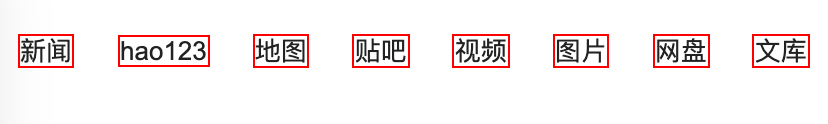

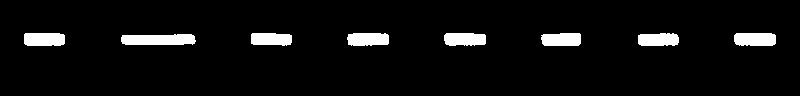

In [1]:
import time

import torch
from PIL import Image,ImageDraw
from myocr.config import MODEL_PATH
from myocr.modeling.model import ModelZoo
from myocr.predictors.text_detection_predictor import TextDetectionParamConverter

model = ModelZoo.load_model("onnx", MODEL_PATH+"dbnet++.onnx", "cuda:0" if torch.cuda.is_available() else "cpu")
p = model.predictor(TextDetectionParamConverter(model.device))
orig_image = Image.open("../../tests/images/test_ocr.png").convert("RGB")
start_time = time.time()
detected = p.predict(orig_image)
end_time = time.time()  
print(f"执行时间: {end_time - start_time} 秒")

draw = ImageDraw.Draw(orig_image)
for box in detected.bounding_boxes: # type: ignore
    draw.polygon(
        [(box.left, box.bottom), (box.left, box.top), (box.right, box.top), (box.right, box.bottom)],
        outline="red",
        width=2,
    )

display(orig_image)

display(Image.fromarray(detected.binary_map))